# INTRODUCTION

The US Accidents dataset ( https://www.kaggle.com/sobhanmoosavi/us-accidents ) This is a countrywide car accident dataset, which covers 49 states of the USA. The accident data are collected from February 2016 to Dec 2020.Currently, there are about 4.2 million accident records in this dataset.This project is part of a course work contributed by Akash Sighal, Naren and Swetha. 

In [37]:
import numpy as np 
import pandas as pd 
import json
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
from datetime import datetime
from scipy import stats
import seaborn as sns

In [2]:
df = pd.read_csv('./US_Accidents_Dec20.csv') # loading the dataset from kaggle
print("The shape of data is:",(df.shape)) # we see that there are around 4.2 million rows and 49 columns

The shape of data is: (4232541, 49)


In [3]:
df.head(5) # looking at a sample data of first 5 rows

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,...,False,False,False,False,True,False,Day,Day,Day,Day


In [4]:
df.columns # 49 columns in the dataset

Index(['ID', 'Source', 'TMC', 'Severity', 'Start_Time', 'End_Time',
       'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)',
       'Description', 'Number', 'Street', 'Side', 'City', 'County', 'State',
       'Zipcode', 'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp',
       'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [5]:
df.info() # information about the columns types , we can see that the start and end times are objects here

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4232541 entries, 0 to 4232540
Data columns (total 49 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   TMC                    float64
 3   Severity               int64  
 4   Start_Time             object 
 5   End_Time               object 
 6   Start_Lat              float64
 7   Start_Lng              float64
 8   End_Lat                float64
 9   End_Lng                float64
 10  Distance(mi)           float64
 11  Description            object 
 12  Number                 float64
 13  Street                 object 
 14  Side                   object 
 15  City                   object 
 16  County                 object 
 17  State                  object 
 18  Zipcode                object 
 19  Country                object 
 20  Timezone               object 
 21  Airport_Code           object 
 22  Weather_Timestamp 

In [7]:
df.nunique() # unique values in each columns

ID                       4232541
Source                         3
TMC                           21
Severity                       4
Start_Time               3657563
End_Time                 3775982
Start_Lat                1371599
Start_Lng                1371288
End_Lat                   587824
End_Lng                   599916
Distance(mi)               14619
Description              2166721
Number                     43868
Street                    210786
Side                           3
City                       12250
County                      1752
State                         49
Zipcode                   494306
Country                        1
Timezone                       4
Airport_Code                2022
Weather_Timestamp         616787
Temperature(F)               840
Wind_Chill(F)                984
Humidity(%)                  100
Pressure(in)                1041
Visibility(mi)                87
Wind_Direction                24
Wind_Speed(mph)              162
Precipitat

In [8]:
df.describe()

,TMC,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,2.716477e+06,4.232541e+06,4.232541e+06,4.232541e+06,1.516064e+06,1.516064e+06,4.232541e+06,1.544592e+06,4.142641e+06,2.336540e+06,4.137074e+06,4.156157e+06,4.133873e+06,3.753215e+06,2.166952e+06
mean,2.083517e+02,2.305035e+00,3.639782e+01,-9.546420e+01,3.690061e+01,-9.859901e+01,3.357021e-01,6.141507e+03,6.147799e+01,5.489319e+01,6.567422e+01,2.969371e+01,9.111991e+00,7.903433e+00,1.244719e-02
std,2.124413e+01,5.332261e-01,4.964404e+00,1.735319e+01,5.165629e+00,1.849590e+01,1.602143e+00,1.492268e+04,1.852586e+01,2.272355e+01,2.272342e+01,8.639260e-01,2.817582e+00,5.330998e+00,1.637154e-01
min,2.000000e+02,1.000000e+00,2.455527e+01,-1.246238e+02,2.457011e+01,-1.244978e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.010000e+02,2.000000e+00,3.352058e+01,-1.173570e+02,3.385420e+01,-1.182077e+02,0.000000e+00,8.980000e+02,4.900000e+01,3.800000e+01,4.900000e+01,2.964000e+01,1.000000e+01,4.600000e+00,0.000000e+00
50%,2.010000e+02,2.000000e+00,3.582542e+01,-9.002078e+01,3.735134e+01,-9.437987e+01,0.000000e+00,2.890000e+03,6.300000e+01,5.800000e+01,6.800000e+01,2.993000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.010000e+02,3.000000e+00,4.018313e+01,-8.084682e+01,4.072593e+01,-8.087449e+01,8.900000e-02,7.330000e+03,7.520000e+01,7.300000e+01,8.500000e+01,3.008000e+01,1.000000e+01,1.040000e+01,0.000000e+00
max,4.060000e+02,4.000000e+00,4.900220e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,4.417500e+02,9.999997e+06,2.030000e+02,1.890000e+02,1.000000e+02,5.804000e+01,1.400000e+02,9.840000e+02,2.500000e+01


## DATA PREPARATION and CLEANING

### a. Handling time variables

In [9]:
# converting the above Start_Time and End_Time columns of type object to datatime object for analysis
df['Start_Time'] = pd.to_datetime(df['Start_Time'])
df['End_Time'] = pd.to_datetime(df['End_Time'])
df['Year']=df['Start_Time'].dt.year # extracting the year 
df['Month']=df['Start_Time'].dt.strftime('%b') # extracting the month 
df['Day']=df['Start_Time'].dt.day # extracting the day 
df['Hour']=df['Start_Time'].dt.hour # extracting the hour 
df['Weekday']=df['Start_Time'].dt.strftime('%a') # extracting the weekday 
df.head()

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Year,Month,Day,Hour,Weekday
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,...,False,Night,Night,Night,Night,2016,Feb,8,5,Mon
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,...,False,Night,Night,Night,Day,2016,Feb,8,6,Mon
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,...,False,Night,Night,Day,Day,2016,Feb,8,6,Mon
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,...,False,Night,Day,Day,Day,2016,Feb,8,7,Mon
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,...,False,Day,Day,Day,Day,2016,Feb,8,7,Mon


In [10]:
# lets get the duration of the using start and end time 
td='Time_Duration(min)'
df[td]=round((df['End_Time']-df['Start_Time'])/np.timedelta64(1,'m'))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4232541 entries, 0 to 4232540
Data columns (total 55 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   ID                     object        
 1   Source                 object        
 2   TMC                    float64       
 3   Severity               int64         
 4   Start_Time             datetime64[ns]
 5   End_Time               datetime64[ns]
 6   Start_Lat              float64       
 7   Start_Lng              float64       
 8   End_Lat                float64       
 9   End_Lng                float64       
 10  Distance(mi)           float64       
 11  Description            object        
 12  Number                 float64       
 13  Street                 object        
 14  Side                   object        
 15  City                   object        
 16  County                 object        
 17  State                  object        
 18  Zipcode               

In [11]:
print("The shape of data is:",(df.shape))

The shape of data is: (4232541, 55)


In [12]:
# checking for outliers for the duration ( look for negative values as the duration cannot be negative )
df[td][df[td]<=0] # there are no outliers with negative values in time duration 

Series([], Name: Time_Duration(min), dtype: float64)

### b. Looking for missing values 

In [13]:
missing = pd.DataFrame(df.isnull().sum()).reset_index()
missing.columns = ['Feature', 'Missing_Percent(%)']
missing['Missing_Percent(%)'] = missing['Missing_Percent(%)'].apply(lambda x: x / df.shape[0] * 100)
missing.loc[missing['Missing_Percent(%)']>0,:] # checking the percentage of missing values 

,Feature,Missing_Percent(%)
2,TMC,35.819240
8,End_Lat,64.180760
9,End_Lng,64.180760
11,Description,0.000047
12,Number,63.506745
15,City,0.003237
18,Zipcode,0.030525
20,Timezone,0.109036
21,Airport_Code,0.212000
22,Weather_Timestamp,1.480057


### Handling non significant variables
- ~65 % End_Lat and End_Lng is missing which may indicate that the GPS was lost due to the damages in the accident. Thus they can be dropped as we have the Start_Lat and Start_Lng. 
- Country will have only entry which will be USA and can be dropped. 
- ID is just an identifier and can be dropped. 
- Number is the street number in the address field which again is not necessary as we have the zipcode. 
- Source is the API that reported the accident which is again not necessary in our analysis.
- Timezone also is not useful as we have the zipcode and can be dropped. 
- Weather_Timestamp can also be dropped as the start time of accident is already availble.
- Airport_Code is the airport based weather station that is closest to the location of the accident and can be dropped. 

In [14]:
df = df.drop(['Number','End_Lat', 'End_Lng', 'Country', 'ID','Source','Timezone','Weather_Timestamp','Airport_Code'], axis=1)
print("The shape of the dataset now is :",(df.shape))

The shape of the dataset now is : (4232541, 46)


### c. Handling TMC NA values

In [15]:
most_freq, count = stats.mode(df['TMC']) #check the mode of TMC column
print ("The most frequently occured for TMC column is : " , most_freq)

The most frequently occured for TMC column is :  [201.]


- TMC has around 35% missing data. According to https://wiki.openstreetmap.org/wiki/TMC/Event_Code_List 201 is reported for accidents and 202 for sever accidents. Checking the frequency / mode of the TMC column, we see that the most frequently occured value is 201. So filling the NA values with 201 for TMC column.

In [16]:
df['TMC'].fillna(value=201, inplace=True)

Now looking at Wind_Speed column data, we see that Wind_Speed is Nan when Wind_Direction is Calm most of the time.

In [17]:
id_2_row = df[df.loc[:,['Wind_Speed(mph)']].isna().any(axis=1)]
print (id_2_row[['Wind_Speed(mph)', 'Wind_Direction']].query('Wind_Direction == \'Calm\''))

         Wind_Speed(mph) Wind_Direction
0                    NaN           Calm
1                    NaN           Calm
33                   NaN           Calm
90                   NaN           Calm
97                   NaN           Calm
...                  ...            ...
4157528              NaN           Calm
4157588              NaN           Calm
4157589              NaN           Calm
4157592              NaN           Calm
4188421              NaN           Calm

[368269 rows x 2 columns]


'Wind_Speed(mph)' is missing when the 'Wind_Direction' is calm, thus we can consider it 0.

In [18]:
df.loc[df['Wind_Direction'] == 'Calm', 'Wind_Speed(mph)'] = 0

Checking the missing values again

In [19]:
missing = pd.DataFrame(df.isnull().sum()).reset_index()
missing.columns = ['Feature', 'Missing_Percent(%)']
missing['Missing_Percent(%)'] = missing['Missing_Percent(%)'].apply(lambda x: x / df.shape[0] * 100)
missing.loc[missing['Missing_Percent(%)']>0,:] # checking the percentage of missing values 

,Feature,Missing_Percent(%)
7,Description,0.000047
10,City,0.003237
13,Zipcode,0.030525
14,Temperature(F),2.124020
15,Wind_Chill(F),44.795809
16,Humidity(%),2.255548
17,Pressure(in),1.804684
18,Visibility(mi),2.331176
19,Wind_Direction,1.975433
20,Wind_Speed(mph),2.623885


### Handling NA values for continous variables
- filling in mean values for Pressure, Temperature, Wind_Chill, Humidity, Wind_Speed and Precipitation as these are the numerical types. 


In [20]:
df['Pressure(in)']=df['Pressure(in)'].fillna(df['Pressure(in)'].mean())
df['Temperature(F)'] = df['Temperature(F)'].fillna(df['Temperature(F)'].mean())
df['Wind_Chill(F)'] = df['Wind_Chill(F)'].fillna(df['Wind_Chill(F)'].mean())
df['Humidity(%)'] = df['Humidity(%)'].fillna(df['Humidity(%)'].mean())
df['Wind_Speed(mph)'] = df['Wind_Speed(mph)'].fillna(df['Wind_Speed(mph)'].mean())
df['Precipitation(in)']=df['Precipitation(in)'].fillna(df['Precipitation(in)'].mean())
df['Visibility(mi)']=df['Visibility(mi)'].fillna(df['Visibility(mi)'].mean())

### Handling NA values for categorical variables
- filling in mode values for Wind_Direction, Weather_Condition. 
- Same percentage of data is missing for Sunrise_Sunset, Civil_Twilight, Nautical_Twilight and Astronomical_Twilight indicating that when one of the column data is missing , the the data from other columns is also missing. So Civil_Twilight, Nautical_Twilight and Astronomical_Twilight columns can be dropped.
- Description has a small amount of data missing , so the rows with Description NA can be dropped as we have a duge dataset.
- Similar to Description, Zipcode and City NA values are dropped. 

In [21]:
df['Wind_Direction'] = df['Wind_Direction'].fillna(df['Wind_Direction'].mode()[0])
df['Weather_Condition'] = df['Weather_Condition'].fillna(df['Weather_Condition'].mode()[0])
df['Sunrise_Sunset'] = df['Sunrise_Sunset'].fillna(df['Sunrise_Sunset'].mode()[0])
df = df.drop(['Civil_Twilight','Nautical_Twilight','Astronomical_Twilight'], axis=1)

In [22]:
df.dropna(subset =['Description', 'City', 'Zipcode'], inplace=True)

In [23]:
missing = pd.DataFrame(df.isnull().sum()).reset_index()
missing.columns = ['Feature', 'Missing_Percent(%)']
missing['Missing_Percent(%)'] = missing['Missing_Percent(%)'].apply(lambda x: x / df.shape[0] * 100)
missing.loc[missing['Missing_Percent(%)']>0,:] # checking the percentage of missing values 

,Feature,Missing_Percent(%)


In [24]:
print("The shape of the dataset after cleaning the data is :",(df.shape))

The shape of the dataset after cleaning the data is : (4231110, 43)


In [27]:
df.to_csv("Cleaned_data.csv")

## VISUALIZATION

In [ ]:
cols = list(pd.read_csv('./Cleaned_data.csv', nrows =1))
df = pd.read_csv('./Cleaned_data.csv', usecols =[i for i in cols if i != 'Unnamed: 0'])
print("The shape of data is:",(df.shape)) 

### Checking Severity values


1      29296
2    3005634
3    1072509
4     123671
Name: Severity, dtype: int64


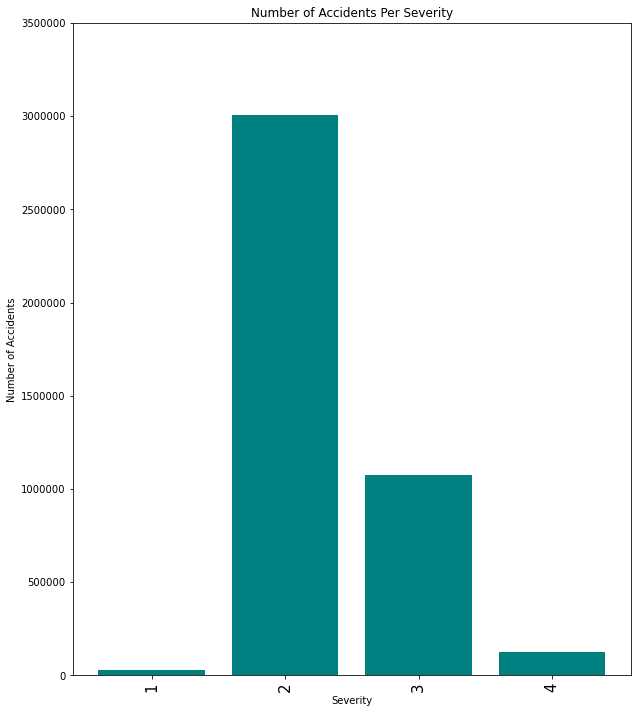

In [70]:
# checking the severity values
df['Severity'].value_counts()
print (df['Severity'].value_counts().sort_index())

plt.figure(figsize=(10, 12))
plt.title('Number of Accidents Per Severity')
plt.bar(df.groupby('Severity').count().index, df.groupby('Severity').count().State, color='teal')
plt.xlabel('Severity')
plt.ylabel('Number of Accidents')
plt.xticks(df.groupby('Severity').count().index, rotation='vertical', size=15)
locs,labels = plt.yticks()
plt.yticks(locs, map(lambda x: "%d" % x, locs))
plt.show()

### We can see that Severity 2 cases are the most reported accident cases. 

### Accident Count

This dataset contains traffic accident records in 49 states. We can use a map to see the accident distribution from 2016 to 2020. The top 10 states with the most accident count are highlighted in the map.

In [119]:
states = df.State.unique()
count_by_state=[]
for i in df.State.unique():
    count_by_state.append(df[df['State']==i].count()['State'])

<AxesSubplot:title={'center':'Accident distribution per state'}, xlabel='States', ylabel='Count'>

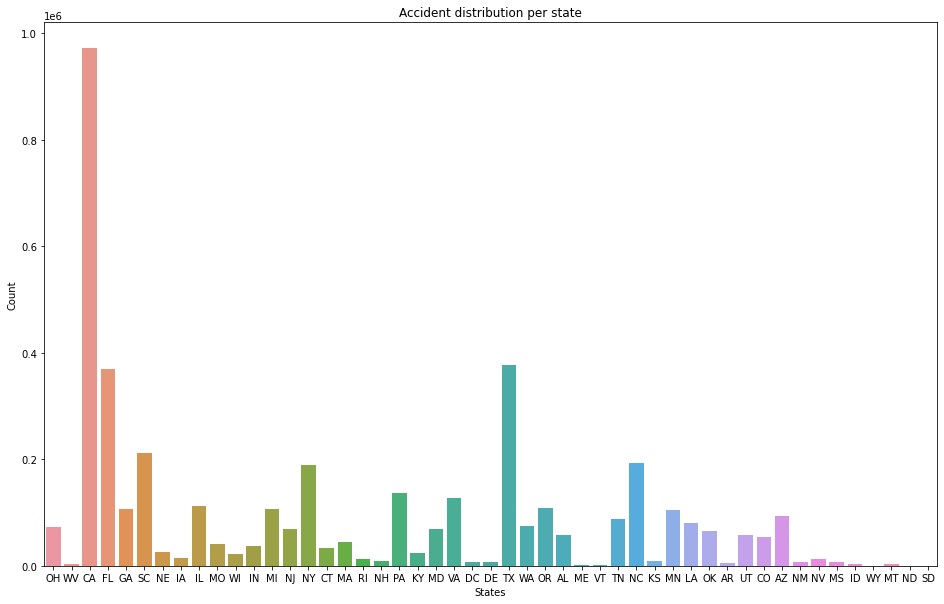

In [120]:
# Accidents Count by states 
plt.figure(figsize=(16,10))
plt.title('Accident distribution per state')
plt.xlabel('States')
plt.ylabel('Count')
sns.barplot(states, count_by_state)



< todo explain the graph > 
CA - 972212 , TX- 376444, FL - 369624, South Carolina - 212710, NC - 193454, NY- 189484, PA-136049, VA - 127946, IL- 111711, OR - 108311, GA-107116, MI - 105772, MN -105482

In [54]:
pip install plotly-geo

Note: you may need to restart the kernel to use updated packages.


In [53]:
pip install plotly

  Using cached plotly-4.14.3-py2.py3-none-any.whl (13.2 MB)
  Using cached retrying-1.3.3.tar.gz (10 kB)
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11429 sha256=ee36bcefffdc124c6a0f4fe37f8f2123287f68d429504c050ef97aaae8182196
  Stored in directory: /Users/swethareddy/Library/Caches/pip/wheels/c4/a7/48/0a434133f6d56e878ca511c0e6c38326907c0792f67b476e56
Successfully built retrying
Note: you may need to restart the kernel to use updated packages.


In [55]:
pip install nbformat

Note: you may need to restart the kernel to use updated packages.


In [123]:
#  Accidents Count by states 

import plotly.graph_objects as go
state_count_acc = pd.value_counts(df['State'])

fig = go.Figure(data=go.Choropleth(
    locations=state_count_acc.index,
    z = state_count_acc.values.astype(float),
    locationmode = 'USA-states',
    colorscale = 'magenta',
    colorbar_title = "Count Accidents",
))

fig.update_layout(
    title_text = '2016 - 2020 US Traffic Accident Dataset by State',
    geo_scope='usa',
)

fig.show()

### Severity Analysis by State

In [124]:
severity_1_by_state = []
severity_2_by_state = []
severity_3_by_state = []
severity_4_by_state = []
for i in states:
    severity_1_by_state.append(df[(df['Severity']==1)&(df['State']==i)].count()['State'])
    severity_2_by_state.append(df[(df['Severity']==2)&(df['State']==i)].count()['State'])
    severity_3_by_state.append(df[(df['Severity']==3)&(df['State']==i)].count()['State'])
    severity_4_by_state.append(df[(df['Severity']==4)&(df['State']==i)].count()['State'])

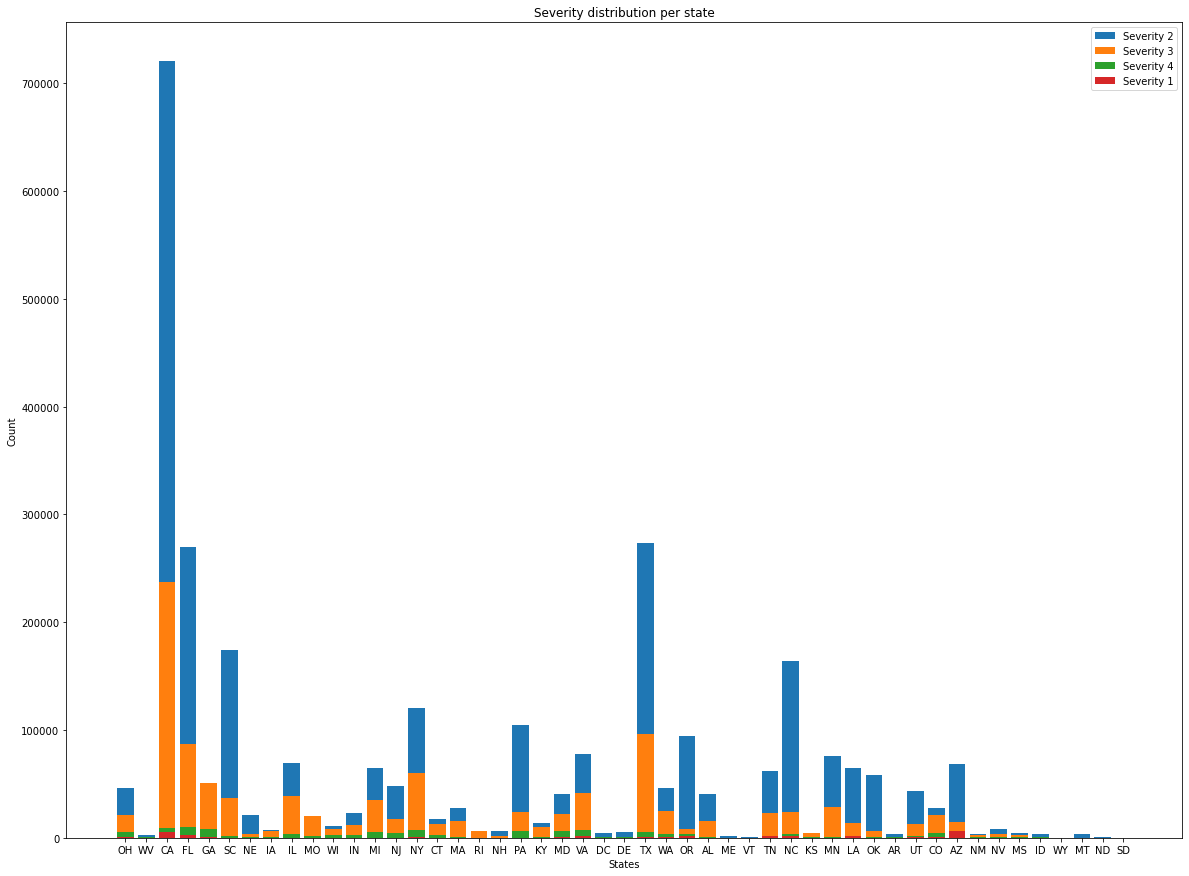

In [126]:
plt.figure(figsize=(20,15))

plt.bar(states, severity_2_by_state, label='Severity 2')
plt.bar(states, severity_3_by_state, label='Severity 3')
plt.bar(states, severity_4_by_state, label='Severity 4')
plt.bar(states, severity_1_by_state, label='Severity 1')

plt.title('Severity distribution per state')
plt.xlabel('States')
plt.ylabel('Count')
plt.legend()

< todo explain > most of the states have sev 2 and sev 3 accidents reported 

## Weather Condition analysis 

In [128]:
Weather = df.groupby('Weather_Condition').count()
Weather

,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Description,Street,Side,...,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Year,Month,Day,Hour,Weekday,Time_Duration(min)
Weather_Condition,,,,,,,,,,,,,,,,,,,,,
Blowing Dust,106,106,106,106,106,106,106,106,106,106,...,106,106,106,106,106,106,106,106,106,106
Blowing Dust / Windy,139,139,139,139,139,139,139,139,139,139,...,139,139,139,139,139,139,139,139,139,139
Blowing Sand,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Blowing Snow,349,349,349,349,349,349,349,349,349,349,...,349,349,349,349,349,349,349,349,349,349
Blowing Snow / Windy,82,82,82,82,82,82,82,82,82,82,...,82,82,82,82,82,82,82,82,82,82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Volcanic Ash,22,22,22,22,22,22,22,22,22,22,...,22,22,22,22,22,22,22,22,22,22
Widespread Dust,151,151,151,151,151,151,151,151,151,151,...,151,151,151,151,151,151,151,151,151,151
Widespread Dust / Windy,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


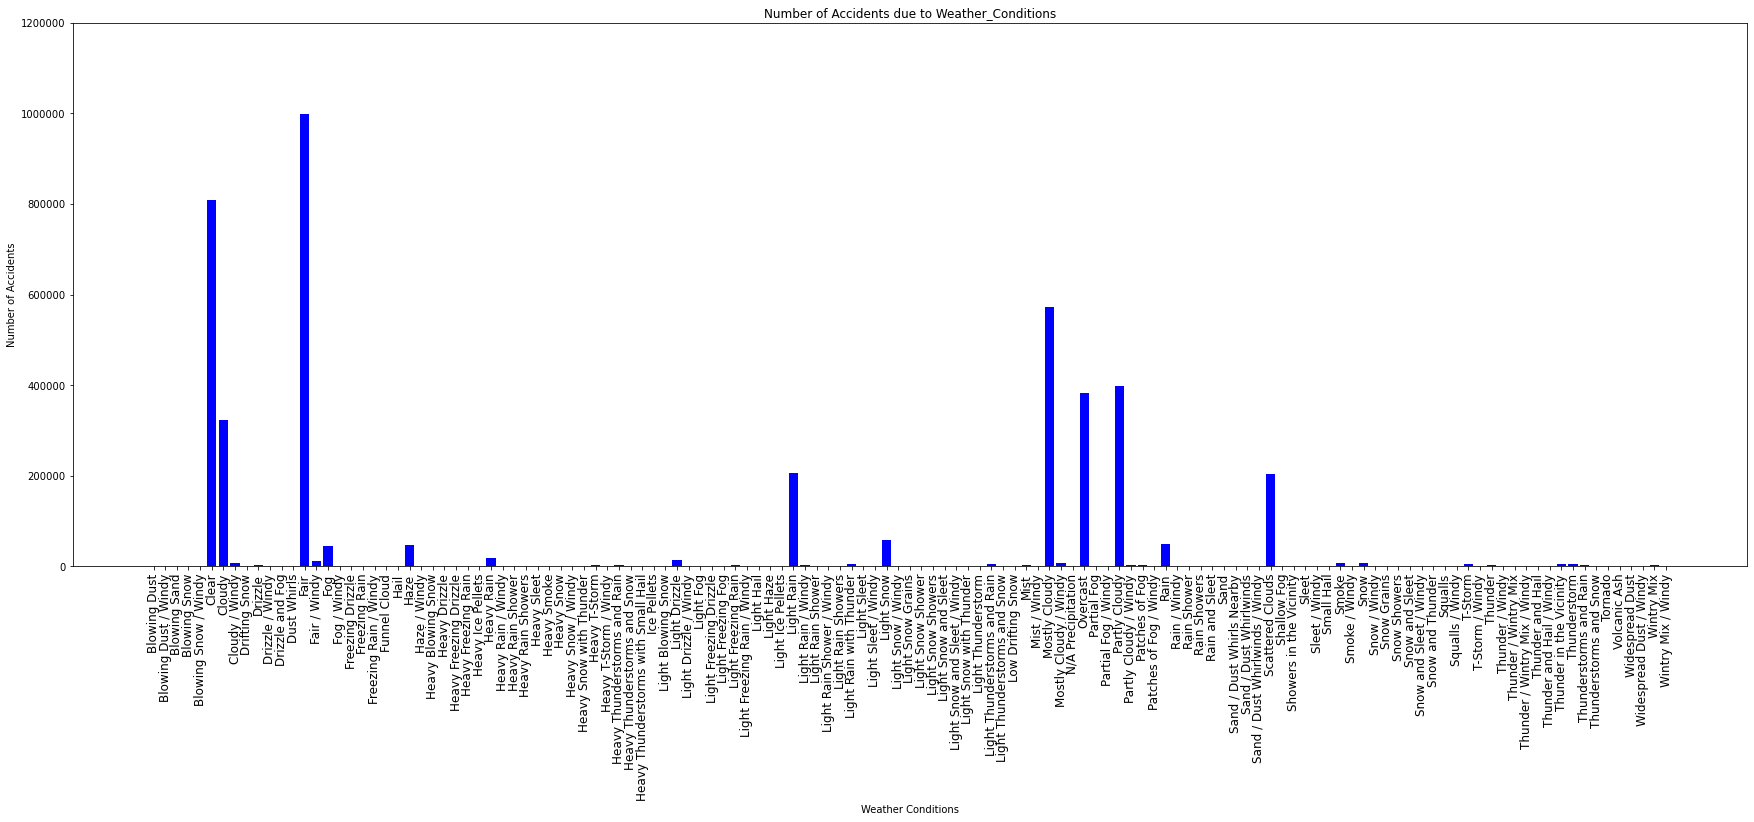

In [130]:
plt.figure(figsize=(30, 10))
plt.title('Number of Accidents due to Weather_Conditions')
plt.bar(df.groupby('Weather_Condition').count().index, df.groupby('Weather_Condition').count().State, color='b')
plt.xlabel('Weather Conditions')
plt.ylabel('Number of Accidents')
plt.xticks(Weather.index, rotation='vertical', size=12)
locs,labels = plt.yticks()
plt.yticks(locs, map(lambda x: "%d" % x, locs))
plt.show()

<< Todo >> from the above graph we can see that most of teh accidents have happened in fair and clear weather. Further cloudy condition have also caused accidents. 
Actually, when we plot the most common weather conditions under each severity level, the distribution looks similar in each level. Only level 1 has an obvious difference that more level 1 accidents happen during clear weather. And we can see more severe accidents (level 3 and 4) also happen a lot during clear days.

So, it seems the severity of an accident is not mainly affected by weather conditions. (Later in modeling part, when we analyze important predictors to include in the model, weather condition is like in the middle between the most important features and the least important ones)

## Analysis with Time 

In [133]:
Time = df.groupby('Day').count()
Time

,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Description,Street,Side,...,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Year,Month,Hour,Weekday,Time_Duration(min)
Day,,,,,,,,,,,,,,,,,,,,,
1,127259,127259,127259,127259,127259,127259,127259,127259,127259,127259,...,127259,127259,127259,127259,127259,127259,127259,127259,127259,127259
2,128720,128720,128720,128720,128720,128720,128720,128720,128720,128720,...,128720,128720,128720,128720,128720,128720,128720,128720,128720,128720
3,131295,131295,131295,131295,131295,131295,131295,131295,131295,131295,...,131295,131295,131295,131295,131295,131295,131295,131295,131295,131295
4,122284,122284,122284,122284,122284,122284,122284,122284,122284,122284,...,122284,122284,122284,122284,122284,122284,122284,122284,122284,122284
5,131266,131266,131266,131266,131266,131266,131266,131266,131266,131266,...,131266,131266,131266,131266,131266,131266,131266,131266,131266,131266
6,140847,140847,140847,140847,140847,140847,140847,140847,140847,140847,...,140847,140847,140847,140847,140847,140847,140847,140847,140847,140847
7,139318,139318,139318,139318,139318,139318,139318,139318,139318,139318,...,139318,139318,139318,139318,139318,139318,139318,139318,139318,139318
8,137489,137489,137489,137489,137489,137489,137489,137489,137489,137489,...,137489,137489,137489,137489,137489,137489,137489,137489,137489,137489
9,140136,140136,140136,140136,140136,140136,140136,140136,140136,140136,...,140136,140136,140136,140136,140136,140136,140136,140136,140136,140136


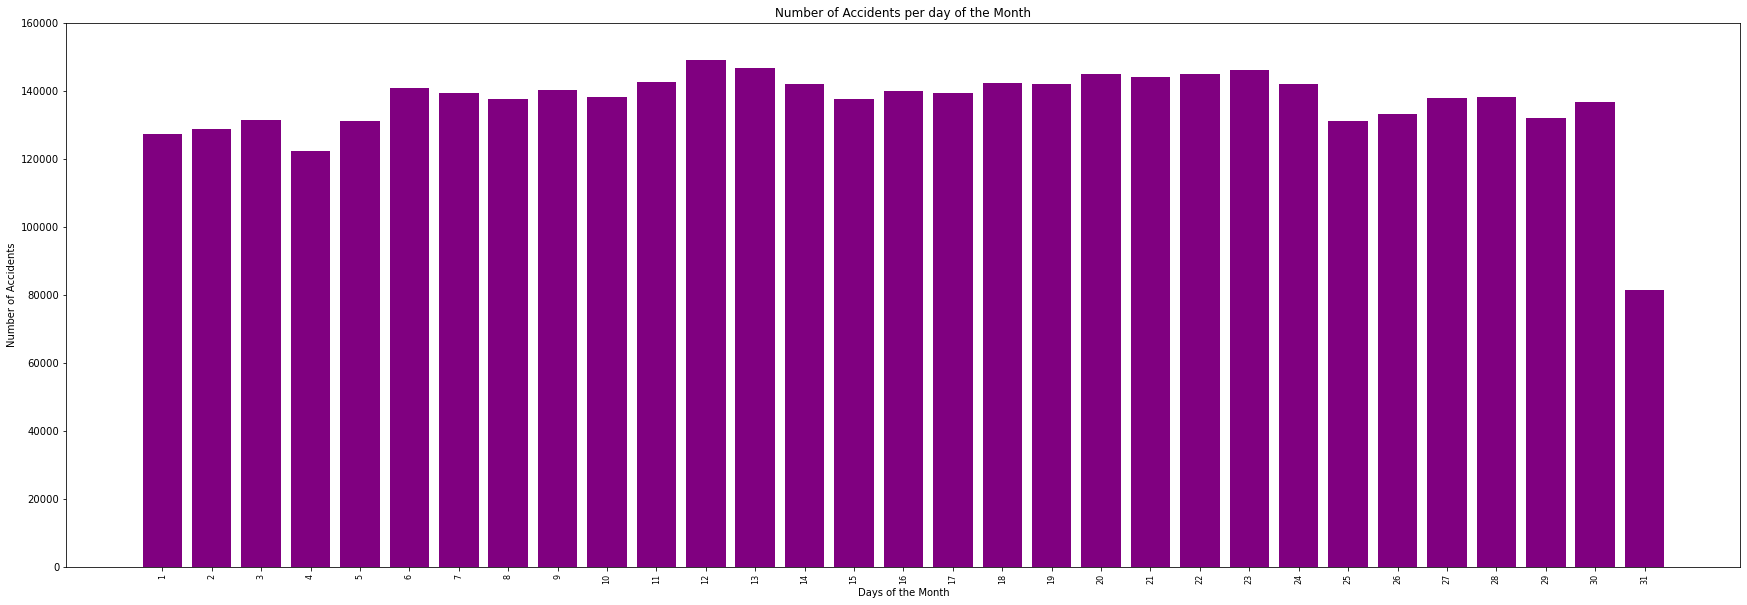

In [134]:
Time = df.groupby('Day').count()
plt.figure(figsize=(30, 10))
plt.title('Number of Accidents per day of the Month')
plt.bar(Time.index, Time.State, color='purple')
plt.xlabel('Days of the Month')
plt.ylabel('Number of Accidents')
plt.xticks(Time.index, rotation='vertical', size=8)
locs,labels = plt.yticks()
plt.yticks(locs, map(lambda x: "%d" % x, locs))
plt.show()

We donot see a significant difference with the number of accidents on different days of the month.

In [141]:
Weekday = df.groupby('Weekday').count()
Weekday

,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Description,Street,Side,...,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Year,Month,Day,Hour,Time_Duration(min)
Weekday,,,,,,,,,,,,,,,,,,,,,
Fri,747362,747362,747362,747362,747362,747362,747362,747362,747362,747362,...,747362,747362,747362,747362,747362,747362,747362,747362,747362,747362
Mon,703573,703573,703573,703573,703573,703573,703573,703573,703573,703573,...,703573,703573,703573,703573,703573,703573,703573,703573,703573,703573
Sat,289632,289632,289632,289632,289632,289632,289632,289632,289632,289632,...,289632,289632,289632,289632,289632,289632,289632,289632,289632,289632
Sun,255821,255821,255821,255821,255821,255821,255821,255821,255821,255821,...,255821,255821,255821,255821,255821,255821,255821,255821,255821,255821
Thu,742700,742700,742700,742700,742700,742700,742700,742700,742700,742700,...,742700,742700,742700,742700,742700,742700,742700,742700,742700,742700
Tue,744427,744427,744427,744427,744427,744427,744427,744427,744427,744427,...,744427,744427,744427,744427,744427,744427,744427,744427,744427,744427
Wed,747595,747595,747595,747595,747595,747595,747595,747595,747595,747595,...,747595,747595,747595,747595,747595,747595,747595,747595,747595,747595


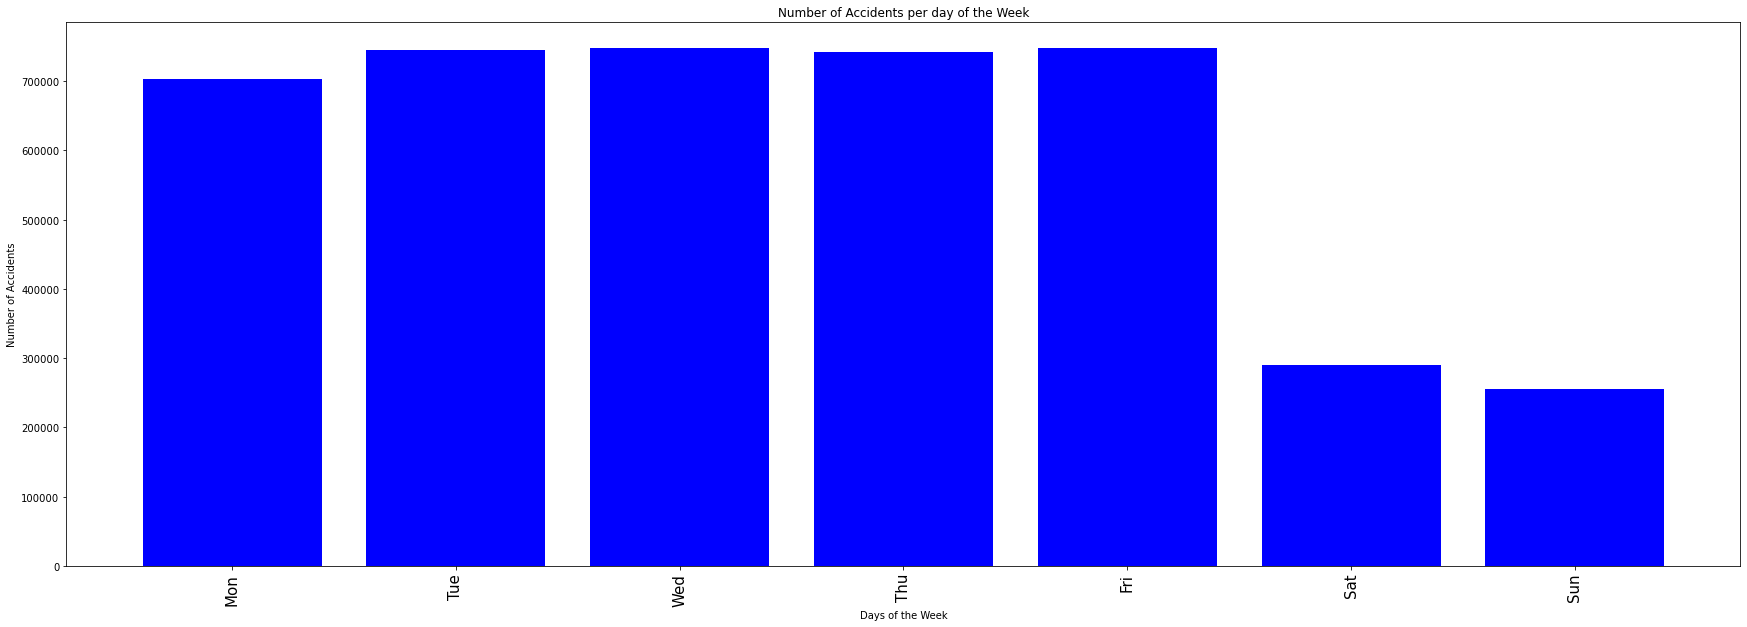

In [151]:
cats = [ 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
Weekday = df.groupby('Weekday').count().reindex(cats) 
plt.figure(figsize=(30, 10))
plt.title('Number of Accidents per day of the Week')
plt.bar(Weekday.index, Weekday.State, color='Blue')
plt.xlabel('Days of the Week')
plt.ylabel('Number of Accidents')
plt.xticks(Weekday.index, rotation='vertical', size=15)
plt.show()

Accidents more on the weekdays 

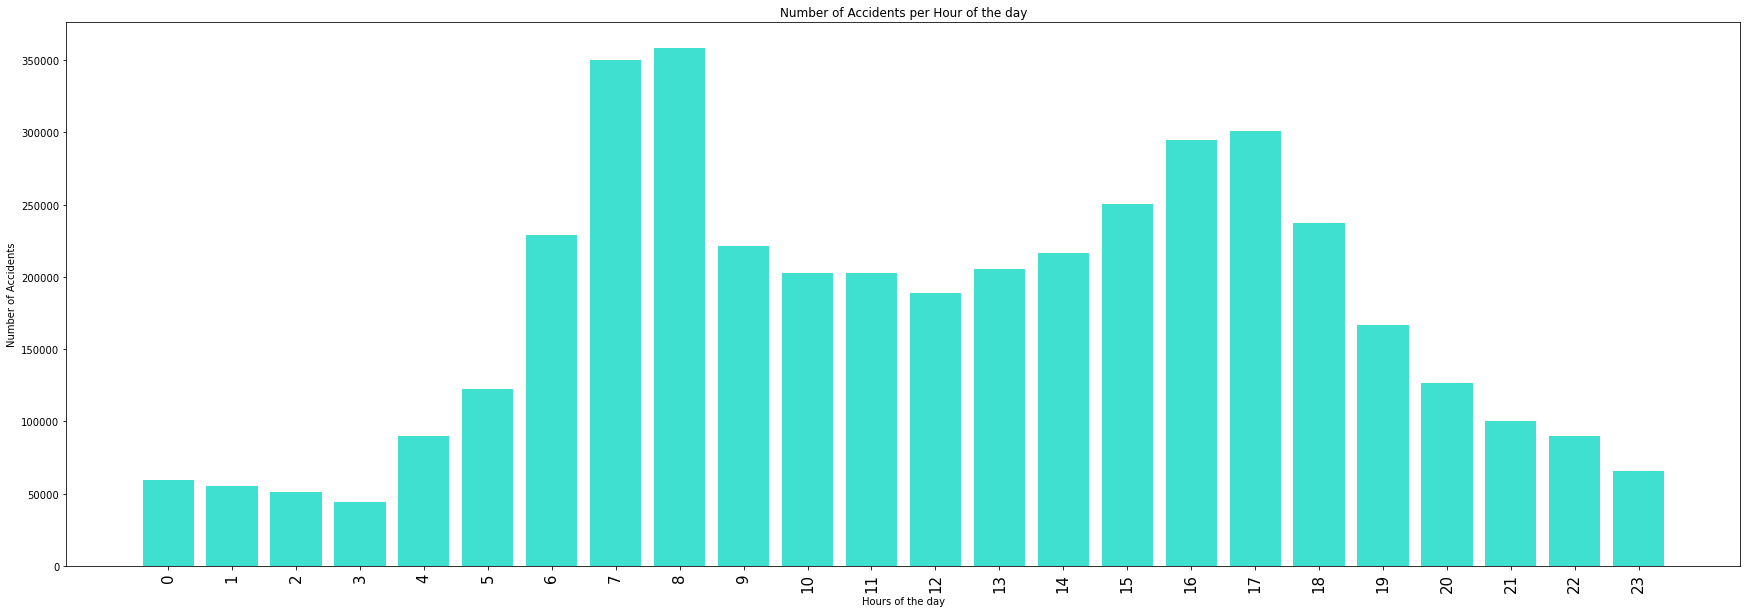

In [155]:
Hour = df.groupby('Hour').count()
plt.figure(figsize=(30, 10))
plt.title('Number of Accidents per Hour of the day')
plt.bar(Hour.index, Hour.Severity, color='turquoise')
plt.xlabel('Hours of the day')
plt.ylabel('Number of Accidents')
plt.xticks(Hour.index, rotation='vertical', size=15)
plt.show()

More accidents reports during the peak hours which around 7 - 8am and 4pm - 5pm.


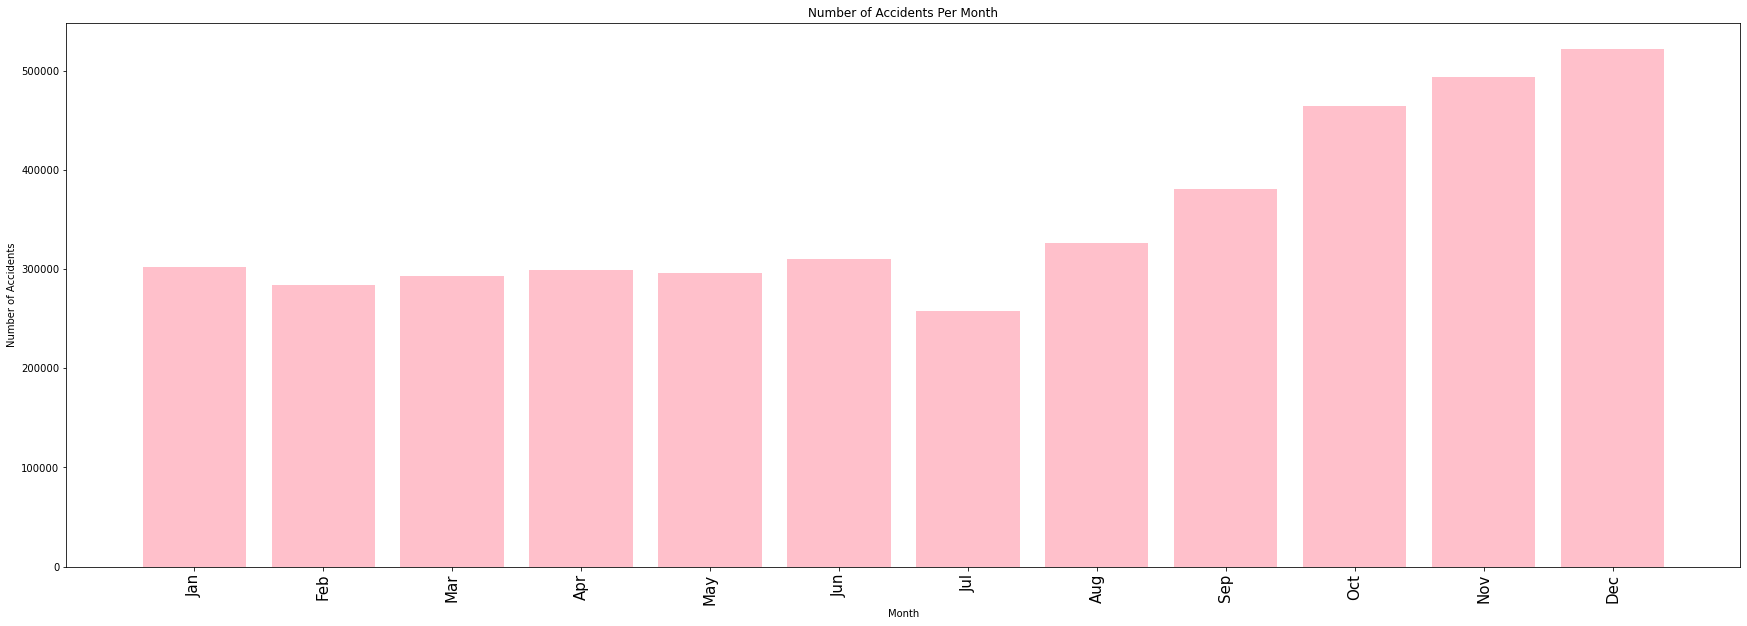

In [158]:
cat = [ 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep','Oct', 'Nov','Dec']
Month = df.groupby('Month').count().reindex(cat) 
plt.figure(figsize=(30, 10))
plt.title('Number of Accidents Per Month')
plt.bar(Month.index, Month.Severity, color='pink')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.xticks(Month.index, rotation='vertical', size=15)
plt.show()

More accidents reported during Nov and dec. The accident count experiences an increase after July and a slight dip in July

From the above subplots, we can see that more accidents happen during weekdays than during weekends.
The weekly pattern observed might be indicative of people being busy during weekdays resulting in more vehicles on the road. 
Lookign at the monthly pattern, the increase in the count might be a result of holiday season and many schools/colleges reopening. 

Also, the hourly pattern of accidents indicate that most of the accidents happen at  two intervals: 7am - 8am, 16pm - 17pm which is the time most of them commute on weekdays. Additionally it indicates that majority accidents happen during the daytime. 

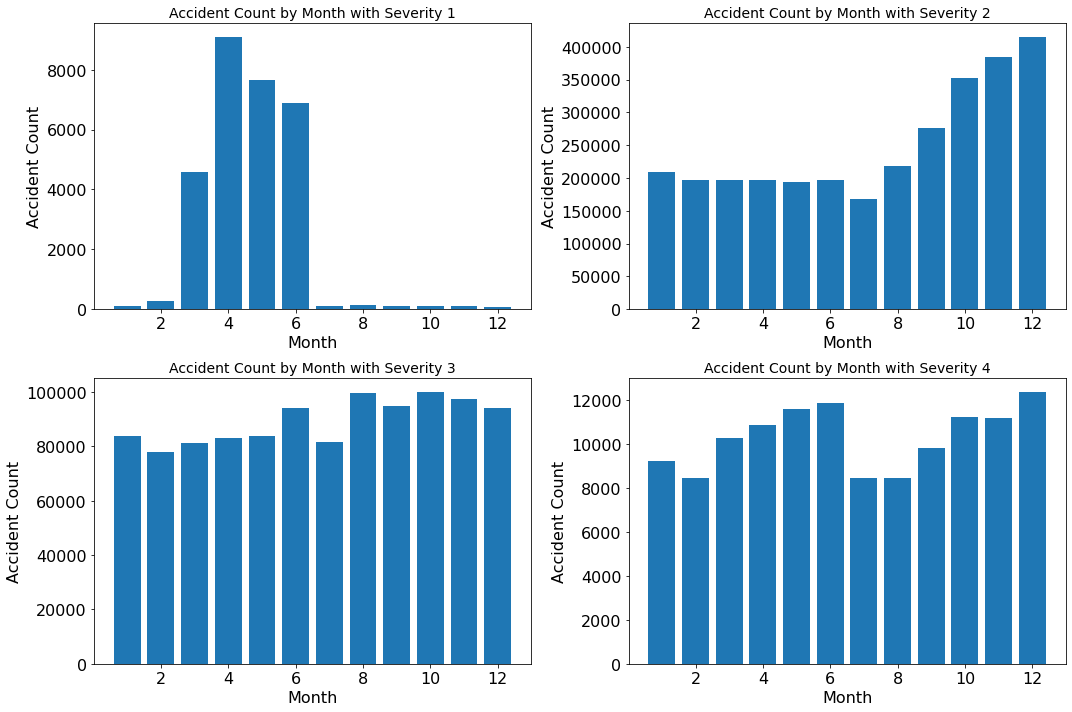

In [162]:
# converting the start time to y month date format to be able to get the time in Y-M-D H:M:S format
df['time'] = pd.to_datetime(df.Start_Time, format='%Y-%m-%d %H:%M:%S')

plt.subplots(2,2,figsize=(15,10))
for s in np.arange(1,5):
    plt.subplot(2,2,s)
    plt.hist(pd.DatetimeIndex(df.loc[df["Severity"] == s]['time']).month, bins=[1,2,3,4,5,6,7,8,9,10,11,12,13], align='left', rwidth=0.8) # for each Severity get the total month accident count across all the years
    plt.title("Accident Count by Month with Severity " + str(s), fontsize=14)
    plt.xlabel("Month", fontsize=16)
    plt.ylabel("Accident Count", fontsize=16)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
plt.tight_layout()
plt.show()

< Todo might not include in final submission > severity 1 accidents are more between March - June

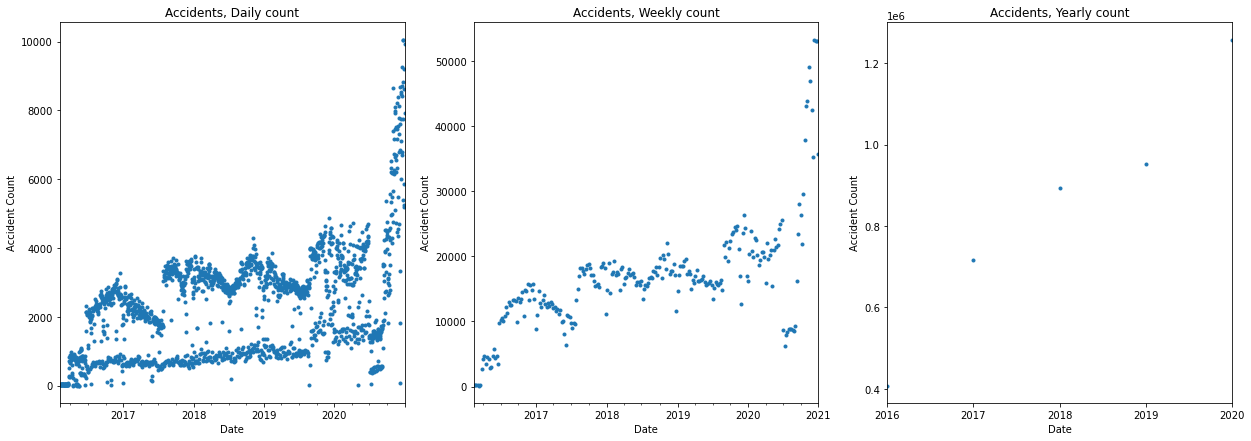

In [175]:
df = df.set_index('time') # setting index to time to be able to retrive the daily, weekly, yearly stats
freq_text = {'D':'Daily','W':'Weekly','Y':'Yearly'}
plt.subplots(1,3,figsize=(21,7))
for i, (fr,text) in enumerate(freq_text.items(),1):
    plt.subplot(1,3,i)
    sample = df.Year[2016:].resample(fr).count()
    sample.plot(style='.')
    plt.title('Accidents, {} count'.format(text))
    plt.xlabel('Date')
    plt.ylabel('Accident Count');

<< todo expalin >>>

In [ ]:
years = ['2016','2017','2018','2019','2020']
fig, _ = plt.subplots(1,5,figsize=(35,7), sharex='all', sharey='all')

fig.suptitle('Accidents by month for Different Years')
plt.xlabel('month')
plt.ylabel('Accidents')
for i, year in enumerate(years,1):
    plt.subplot(1,5,i)
    sample = df.loc[year].State.resample('M').count()
    sample.plot()
    #plt.ylim(0,100000)
    plt.title('Accidents, {} count'.format(text))
    plt.xlabel('Date')
    plt.ylabel('Accident Count');

data is starting from feb of 2016 and 